In [113]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [114]:
def euclidian_dist(a,b):
    return np.sum(np.sqrt((a-b)**2), axis=1)

In [115]:
def cosine_similarity(a,b):
    return (np.dot(a,b)) / ((np.linalg.norm(a, axis=1))*(np.linalg.norm(b)))

In [116]:
def k_nearest_neighbors(n_neighbors, X=None, y=None, train=None, test=None, split=True, split_rate=0.8):
    
    if split == True:
        
        data = np.hstack((X, y[:, np.newaxis]))
        
        np.random.shuffle(data)

        train, test = np.split(data, [int(split_rate*(data.shape[0]))])

    train_x = train[:,:-1]
    train_y = train[:, 2]

    test_x = test[:,:-1]
    test_y = test[:, 2]

    train_x = train_x.astype(int)
    train_y = train_y.astype(int)
    test_x = test_x.astype(int)
    test_y = test_y.astype(int)

    predicted_y = np.array([np.argmax(np.bincount(train_y[np.argsort(euclidian_dist(train_x, x))[0:n_neighbors]])) for x in test_x])
  
    accuracy = float(sum(predicted_y == test_y))/ float(len(test_y))
  
    return (accuracy, predicted_y, test_y)

In [117]:
def confusion_matrix(test_y, predicted_y, class_num):
  
    return np.bincount(test_y * class_num + predicted_y).reshape((class_num, class_num))

In [118]:
def cross_validation(knn, X, y, cv):
    
    accuracy_list = []
    data = np.array(np.hstack((X,y[:, np.newaxis])))
    np.random.shuffle(data)
    for k in range(cv):
        splitted = np.split(data, cv)
        test = splitted.pop(k)
        train = np.vstack(splitted)

        accuracy, predicted_y, test_y = k_nearest_neighbors(10, train=train, test=test, split=False)
        accuracy_list.append(accuracy)
        print('Accuracy for k = {} is {}'.format(k, accuracy))

        conf_matrix = confusion_matrix(test_y, predicted_y, 3)
        print('Confusion matrix for k = {} :'.format(k))
        print(conf_matrix)
 
    mean_accuracy = sum(accuracy_list) / len(accuracy_list)
    print(mean_accuracy)

In [119]:
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, random_state=21)

cv = 5

acc, _, _= k_nearest_neighbors(10, X, y)

cross_validation(k_nearest_neighbors, X, y, cv)

print('Accuracy for knn without cross validation: ', acc)



Accuracy for k = 0 is 0.845
Confusion matrix for k = 0 :
[[59 14  0]
 [ 2 61  1]
 [ 0 14 49]]
Accuracy for k = 1 is 0.805
Confusion matrix for k = 1 :
[[55 17  0]
 [ 0 54  3]
 [ 0 19 52]]
Accuracy for k = 2 is 0.845
Confusion matrix for k = 2 :
[[52 14  0]
 [ 0 62  0]
 [ 0 17 55]]
Accuracy for k = 3 is 0.825
Confusion matrix for k = 3 :
[[53 14  0]
 [ 2 67  2]
 [ 1 16 45]]
Accuracy for k = 4 is 0.68
Confusion matrix for k = 4 :
[[54  0  0]
 [43 34  2]
 [18  1 48]]
0.8
Accuracy for knn without cross validation:  0.735


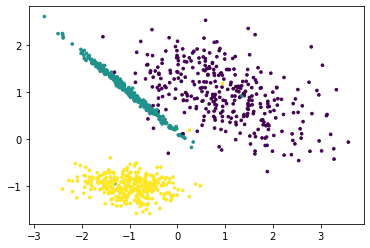

In [120]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=7);